In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Data

In [4]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0/255.0,))])

trainset = torchvision.datasets.FashionMNIST(root='data',
                                             train=True,
                                             download=True,
                                             transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=10,
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data',
                                            train=False,
                                            download=True,
                                            transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1024,
                                         num_workers=10,
                                         shuffle=True)

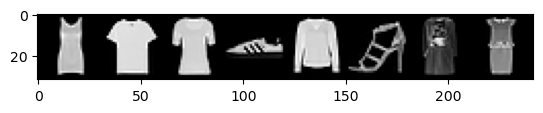

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))
    break

### Model

In [8]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10)
)
model = model.to(device)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [9]:
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28).to(device)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


### Loss, Optimizer and Evaluation Function

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [17]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)

    return test_loss, accuracy

In [18]:
test_loss, accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {accuracy}')

test_loss: 96.80116653442383
test_accuracy: 4.97


### train

In [19]:
# Parameters
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 100

In [22]:
# train
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f'Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:2f}%, Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.2f}%')

    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/100], Loss: 14.2899, Accuracy: 48.056667%, Test loss: 12.7186, Test accuracy: 52.03%
Epoch [2/100], Loss: 11.5345, Accuracy: 55.146667%, Test loss: 10.9232, Test accuracy: 56.44%
Epoch [3/100], Loss: 10.1174, Accuracy: 58.858333%, Test loss: 9.8185, Test accuracy: 59.61%
Epoch [4/100], Loss: 9.1801, Accuracy: 61.466667%, Test loss: 9.0680, Test accuracy: 61.67%
Epoch [5/100], Loss: 8.4868, Accuracy: 63.235000%, Test loss: 8.5169, Test accuracy: 62.67%
Epoch [6/100], Loss: 7.9476, Accuracy: 64.588333%, Test loss: 7.9923, Test accuracy: 64.78%
Epoch [7/100], Loss: 7.5270, Accuracy: 65.658333%, Test loss: 7.6017, Test accuracy: 65.46%
Epoch [8/100], Loss: 7.1710, Accuracy: 66.695000%, Test loss: 7.2654, Test accuracy: 66.16%
Epoch [9/100], Loss: 6.8788, Accuracy: 67.398333%, Test loss: 7.0206, Test accuracy: 67.01%
Epoch [10/100], Loss: 6.6222, Accuracy: 68.123333%, Test loss: 6.7816, Test accuracy: 67.78%
Epoch [11/100], Loss: 6.4080, Accuracy: 68.813333%, Test loss: 6.5911, Tes

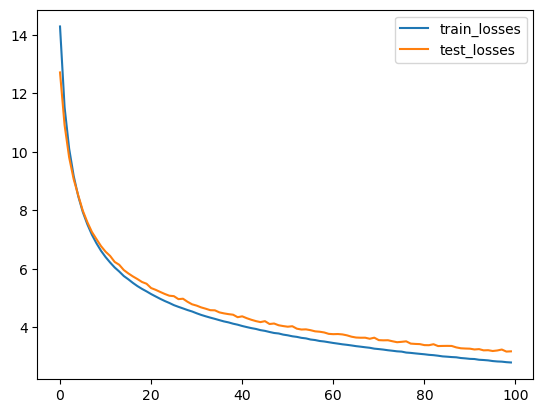

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

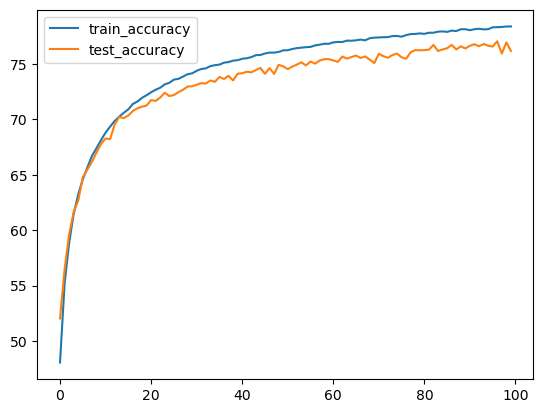

In [24]:
plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()